### Thomson Sampling Model

#### importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### importing the dataset

In [3]:
dataset = pd.read_csv('../Datasets/Ads_CTR_Optimisation.csv')

#### implementing the thomson sampling

In [7]:
## implementing the thomson sampling
import random
N = 500
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

In [8]:
print(total_reward)

93


#### Visualising the results

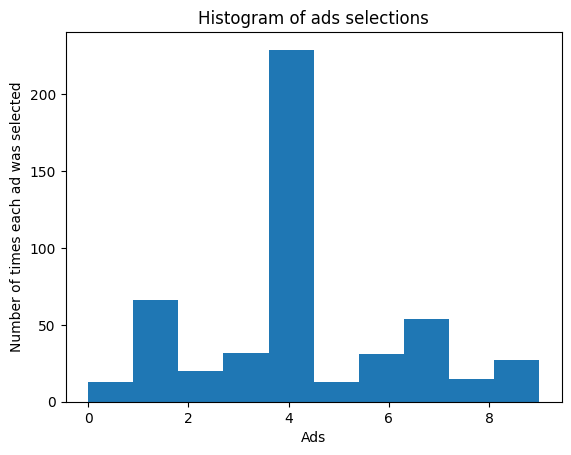

In [9]:
## Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### Summary

**Thompson Sampling** is a probabilistic algorithm used to solve the multi-armed bandit problem, which is about choosing the best option (ad, product, etc.) from several choices to maximize rewards (clicks, sales, etc.). It works by randomly selecting options based on their probability of being the best, updating these probabilities as more data is collected.

#### How Thompson Sampling Works
- Each option (ad) starts with an equal chance of being the best.
- As you collect results (clicks or no clicks), you update your belief about each option.
- At each step, you randomly pick an option based on its updated probability.
- Over time, the algorithm focuses more on the options that perform well.

#### Difference from UCB (Upper Confidence Bound) Model
- **UCB Model**: Always picks the option with the highest upper confidence bound (a calculated score based on average reward and uncertainty). It is more deterministic and explores less randomly.
- **Thompson Sampling**: Picks options based on probability distributions, allowing more random exploration.

| Feature                | UCB Model                          | Thompson Sampling                  |
|------------------------|------------------------------------|------------------------------------|
| Selection Strategy     | Deterministic (highest score)      | Probabilistic (random sampling)    |
| Exploration vs. Exploit| Less exploration                   | More balanced exploration          |
| Complexity             | Simple to implement                | Slightly more complex              |
| Performance            | Good, but can miss best options    | Often better, finds best options   |

#### Example (Simple Terms)
Imagine you have 10 different ads. You want to show the ad that gets the most clicks:
- **UCB**: Always shows the ad with the highest calculated score.
- **Thompson Sampling**: Sometimes tries other ads, even if one ad looks best, to make sure it doesn't miss a better one.

#### Which is Best and Why?
- **Thompson Sampling** is often preferred because it balances trying new options and sticking with the best ones. It usually finds the best option faster and avoids getting stuck with a suboptimal choice.
- It is widely used in online advertising, recommendation systems, and clinical trials.

#### Why Use Thompson Sampling?
- Handles uncertainty better.
- Adapts quickly to changing data.
- Works well when you have limited data.

**In summary:**  
Thompson Sampling is a smart way to test different choices and learn which is best, especially when you don't have much information at the start. It is more flexible and effective than UCB in many real-world situations.